In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

/users/k/karmimy/anaconda3/envs/DGT/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### FAST

In [2]:
timestamps = ['1','2','3','4','5','6','∞']
can = [81.,84.,89.,91.,89.,89.,79.,84.,65.,58.]
colab = [92.,91.67,92.36,91.99,91.33,92.17,91.65,91.35,91.32,91.32]
legis = [77.55,77.99,78.44,78.18,78.18,0.5,86.55,74.32,56.72,0.5]
vote = [89.6,90.15,89.8,86.5,86.5,86.4,86.4,86.5,85.6,86.5]
enron = [93.35,92.59,92.95,93.46,93.36,93.09,92.55,92.49,92.5,92.46]

### FASTLink

In [3]:
can = [81.,84.,89.,91.,89.,89.,87.]
colab = [91.4,91.7,92.,91.8,92.3,91.1,90.7]
legis = [89.6,90.5,91.6,92.18,92.14,88.2,86.]
#trade = [96.6,96.73,96.80,96.90,96.90,96.93]

In [4]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FuncFormatter

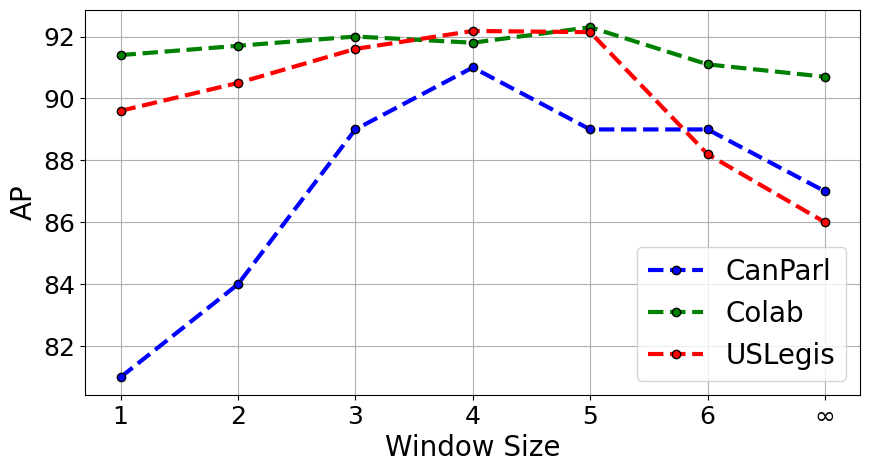

In [9]:


# Set the figure size to be more rectangular (width, height)
plt.figure(figsize=(10, 5))

# Assuming 'can', 'colab', 'trade', 'legis', and 'timestamps' are numpy arrays
datasets = {'CanParl': can, 'Colab': colab,  'USLegis': legis}

# Define a color for each dataset
colors = {'CanParl': 'blue', 'Colab': 'green', 'Trade': 'green', 'USLegis': 'red'}

# Plot the curves with points for each value
for name, data in datasets.items():
    plt.plot(timestamps, data, marker='o', linewidth=3, linestyle='--', label=name, mec='black', mfc=colors[name], color=colors[name])



# Add a legend
plt.legend(fontsize=20)

# Add labels for the axes with a larger fontsize and a title for the plot
plt.xlabel('Window Size', fontsize=20,loc='center')
plt.ylabel('AP', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
# Add a grid
plt.grid(True)

# Display the plot
plt.show()

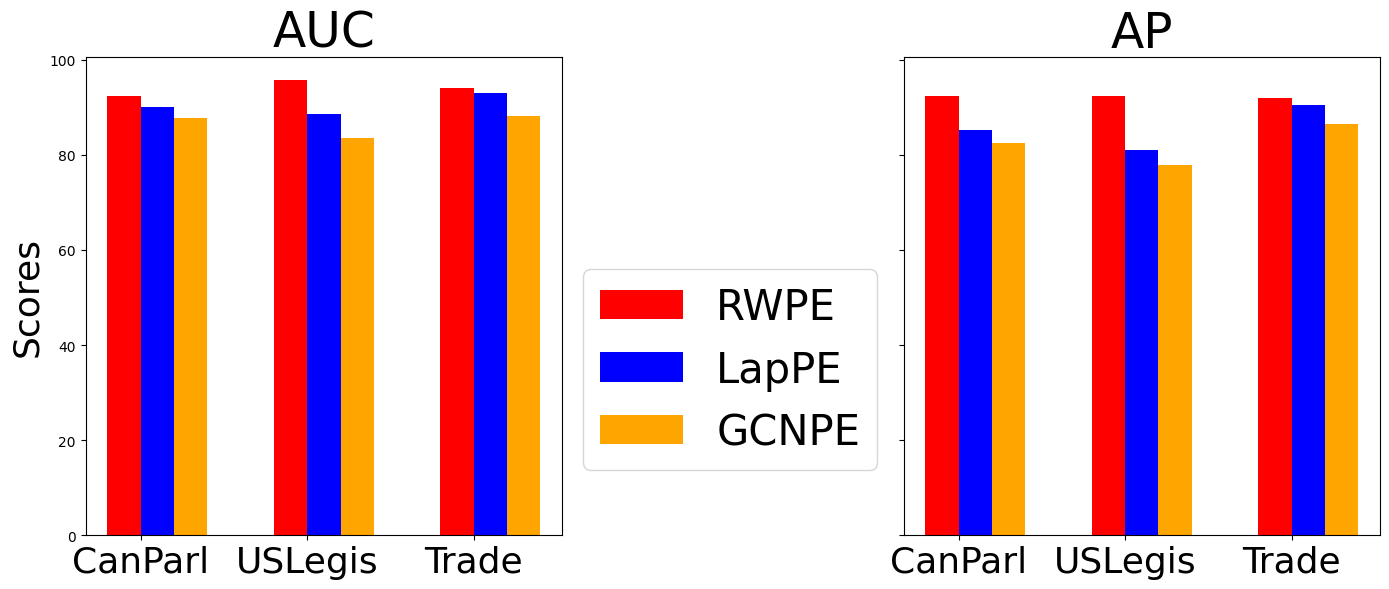

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset names
datasets = ['CanParl', 'USLegis', 'Trade']

# AUC Scores
auc_scores = {
    'RWPE': [92.37, 95.80, 94.01],
    'LapPE': [90.02, 88.54, 92.93],
    'GCNPE': [87.81,83.65,88.27],
}

# AP Scores
ap_scores = {
    'RWPE': [92.44, 92.66, 92.06],
    'LapPE': [85.22, 81.09, 90.56],
    'GCNPE': [82.50,77.81,86.54],
}

# Colors for each method
colors = ['red', 'blue', 'orange', 'red']

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Function to add bars for each metric
def add_bars(ax, scores, title, datasets, colors,legend=False):
    n = len(datasets)
    ind = np.arange(n)
    width = 0.2
    
    for i, (label, vals) in enumerate(scores.items()):
        ax.bar(ind - width/2 + i*width, vals, width, label=label, color=colors[i])
    
    ax.set_title(title, fontsize=35)
    ax.set_xticks(ind)
    ax.set_xticklabels(datasets, fontsize=26)
    if legend:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 0.6), fontsize=30)

# Add bars for each subplot
add_bars(ax[0], auc_scores, 'AUC', datasets, colors,legend=True)
add_bars(ax[1], ap_scores, 'AP', datasets, colors)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax[0].set_ylabel('Scores', fontsize=26)
#ax[0].set_xlabel('Dataset', fontsize=16)
#ax[1].set_xlabel('Dataset', fontsize=16)

plt.tight_layout()
plt.show()